In [229]:
import pandas as pd
import os
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
pd.set_option("max_columns", 30)

# READING 3 DIFFERENENT DATASETS
trends = pd.read_csv("../Data/trends.csv")

ETH = pd.read_csv("../Data/ETH_price.csv")
ETH = ETH[["date", "close"]]

data = pd.read_csv("../Data/train_complete.csv")
data = data.iloc[:36000, :]
data['time'] = data['time'].apply(lambda x: x[:10])

c = list(data.columns)
c[0] = "date"
data.columns = c

# MERGING AND CHANING COLUMNS
data = pd.merge(data, trends, on='date')
data = pd.merge(data, ETH, on='date')

data['date'] = pd.to_timedelta(pd.to_datetime(data['date']), unit = 'seconds').astype('timedelta64[D]')

data['prestige_time_limit'] = data['prestige_time_limit'].apply(lambda x: np.nan if pd.isnull(x) else x[:10])
data['prestige_time_limit'] = pd.to_timedelta(pd.to_datetime(data['prestige_time_limit']), unit = 'seconds').astype('timedelta64[D]')

data = data.fillna(0)

data.head(5)

,date,ID,USD,generation,color,is_fancy,is_exclusive,fancy_type,is_prestige,prestige_type,prestige_ranking,fancy_ranking,prestige_time_limit,enhanced_cattributes_eyes,enhanced_cattributes_pattern,enhanced_cattributes_body,enhanced_cattributes_mouth,enhanced_cattributes_colorprimary,enhanced_cattributes_colorsecondary,enhanced_cattributes_colortertiary,enhanced_cattributes_coloreyes,status_cooldown_index,status_is_ready,status_is_gestating,purrs_count,purrs_is_purred,watchlist_count,watchlist_is_watchlisted,cryptokitties,close
0,18074.0,1320917,2.07,1.0,olive,False,False,0,False,0,0.0,0.0,0.0,olive,confuzzled,chronic,ganado,koladiviya,brownies,royalpurple,kalahari,0.0,True,False,0.0,False,0.0,False,0.485359,294.27
1,18074.0,1309519,2.06,1.0,thundergrey,False,False,0,False,0,0.0,0.0,0.0,pouty,slyboots,ganado,pixiebob,bananacream,egyptiankohl,kalahari,thundergrey,0.0,True,False,0.0,False,0.0,False,0.485359,294.27
2,18074.0,1612927,0.59,21.0,dahlia,False,False,0,False,0,0.0,0.0,0.0,totesbasic,pixiebob,tundra,oceanid,ruhroh,hanauma,skyblue,dahlia,11.0,True,False,2.0,False,0.0,False,0.485359,294.27
3,18074.0,1217231,0.90,21.0,olive,False,False,0,False,0,0.0,0.0,0.0,olive,spangled,slyboots,wasntme,alicorn,koladiviya,mauveover,egyptiankohl,11.0,True,False,3.0,False,0.0,False,0.485359,294.27
4,18074.0,1434066,2.09,5.0,sapphire,False,False,0,False,0,0.0,0.0,0.0,munchkin,pouty,asif,mittens,featherbrain,cottoncandy,royalpurple,granitegrey,2.0,True,False,2.0,False,0.0,False,0.485359,294.27


## OneHotEncode:
> [color, fancy_type, prestige_type, enhanced_cattributes_eyes, enhanced_cattributes_pattern, enhanced_cattributes_body, enhanced_cattributes_mouth, enhanced_cattributes_colorprimary, enhanced_cattributes_colorsecondary	, enhanced_cattributes_colortertiary, enhanced_cattributes_coloreyes]

In [230]:
pd.get_dummies(data[['color', 'fancy_type', 'prestige_type', 'enhanced_cattributes_eyes', 'enhanced_cattributes_pattern', 'enhanced_cattributes_body', 'enhanced_cattributes_mouth', 'enhanced_cattributes_colorprimary', 'enhanced_cattributes_colorsecondary' , 'enhanced_cattributes_colortertiary', 'enhanced_cattributes_coloreyes']]).head(10)

,color_autumnmoon,color_babypuke,color_bridesmaid,color_bubblegum,color_chestnut,color_coralsunrise,color_cyan,color_dahlia,color_doridnudibranch,color_downbythebay,color_eclipse,color_forgetmenot,color_gold,color_isotope,color_kaleidoscope,...,enhanced_cattributes_coloreyes_swarley,enhanced_cattributes_coloreyes_sweetmeloncakes,enhanced_cattributes_coloreyes_thundergrey,enhanced_cattributes_coloreyes_thunderstruck,enhanced_cattributes_coloreyes_tiger,enhanced_cattributes_coloreyes_tinybox,enhanced_cattributes_coloreyes_topaz,enhanced_cattributes_coloreyes_turtleback,enhanced_cattributes_coloreyes_twilightsparkle,enhanced_cattributes_coloreyes_universe,enhanced_cattributes_coloreyes_violet,enhanced_cattributes_coloreyes_wiley,enhanced_cattributes_coloreyes_wolfgrey,enhanced_cattributes_coloreyes_wuvme,enhanced_cattributes_coloreyes_yokel
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [231]:
pd.get_dummies(data).head(10)

,date,ID,USD,generation,is_fancy,is_exclusive,is_prestige,prestige_ranking,fancy_ranking,prestige_time_limit,status_cooldown_index,status_is_ready,status_is_gestating,purrs_count,purrs_is_purred,...,enhanced_cattributes_coloreyes_swarley,enhanced_cattributes_coloreyes_sweetmeloncakes,enhanced_cattributes_coloreyes_thundergrey,enhanced_cattributes_coloreyes_thunderstruck,enhanced_cattributes_coloreyes_tiger,enhanced_cattributes_coloreyes_tinybox,enhanced_cattributes_coloreyes_topaz,enhanced_cattributes_coloreyes_turtleback,enhanced_cattributes_coloreyes_twilightsparkle,enhanced_cattributes_coloreyes_universe,enhanced_cattributes_coloreyes_violet,enhanced_cattributes_coloreyes_wiley,enhanced_cattributes_coloreyes_wolfgrey,enhanced_cattributes_coloreyes_wuvme,enhanced_cattributes_coloreyes_yokel
0,18074.0,1320917,2.07,1.0,False,False,False,0.0,0.0,0.0,0.0,True,False,0.0,False,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,18074.0,1309519,2.06,1.0,False,False,False,0.0,0.0,0.0,0.0,True,False,0.0,False,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,18074.0,1612927,0.59,21.0,False,False,False,0.0,0.0,0.0,11.0,True,False,2.0,False,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,18074.0,1217231,0.90,21.0,False,False,False,0.0,0.0,0.0,11.0,True,False,3.0,False,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,18074.0,1434066,2.09,5.0,False,False,False,0.0,0.0,0.0,2.0,True,False,2.0,False,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,18074.0,982842,0.94,1.0,False,False,False,0.0,0.0,0.0,1.0,True,False,0.0,False,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,18074.0,1119338,0.37,3.0,False,False,False,0.0,0.0,0.0,1.0,True,False,0.0,False,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,18074.0,1628050,15.08,16.0,True,False,False,0.0,528.0,0.0,10.0,True,False,0.0,False,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,18074.0,1059665,1.92,1.0,False,False,False,0.0,0.0,0.0,0.0,True,False,0.0,False,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,18074.0,13171,120.59,12.0,False,False,False,0.0,0.0,0.0,10.0,True,False,0.0,False,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [232]:
y = pd.get_dummies(data)['USD']
X = pd.get_dummies(data).drop('USD', axis = 1)

In [233]:
length = 36000 # number of last transactions to consider
n = 300 # the lastest values to predict on

y = y[:length]
X = X.iloc[:length, :]

X_test = X.iloc[:n, :]
y_test = y[:n]

X_train = X.iloc[n:, :]
y_train = y[n:]

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [234]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, median_absolute_error

regr = RandomForestRegressor(n_estimators=100, verbose= 3,n_jobs=8)
# regr = KNeighborsRegressor(n_neighbors=5)
# regr = ElasticNet(max_iter=3000)
# regr = SVR()
regr.fit(X_train, y_train)

pred = regr.predict(X_train)
print('model errors')
print('MSE (mean sqaured error) : ' + str(mean_squared_error(y_train, pred)))
print('MAE (mean absolute error): ' + str(mean_absolute_error(y_train, pred)))
print('MSE (median absolute error): ' + str(median_absolute_error(y_train, pred)))

pred = regr.predict(X_test)
print('future prediction errors (n next sales)')
print('MSE (mean sqaured error) : ' + str(mean_squared_error(y_test, pred)))
print('MAE (mean absolute error): ' + str(mean_absolute_error(y_test, pred)))
print('MSE (median absolute error): ' + str(median_absolute_error(y_test, pred)))

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 100building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100

building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100


[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:   54.2s


building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65

[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:  4.5min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


model errors
MSE (mean sqaured error) : 174.33380389800092
MAE (mean absolute error): 1.1218385148453907
MSE (median absolute error): 0.18300000000000083
future prediction errors (n next sales)
MSE (mean sqaured error) : 560.5217976680833
MAE (mean absolute error): 5.362613670463795
MSE (median absolute error): 0.8965783333333339


## NEED TO DO SOME ANALYSIS ON THIS !
model errors
MSE (mean sqaured error) : 174.33380389800092
MAE (mean absolute error): 1.1218385148453907
MSE (median absolute error): 0.18300000000000083
future prediction errors (n next sales)
MSE (mean sqaured error) : 560.5217976680833
MAE (mean absolute error): 5.362613670463795
MSE (median absolute error): 0.8965783333333339

In [235]:
p = []
a = []
for i in range(80):
#     print(regr.predict(X_test.iloc[-i,:].values.reshape(1,-1)),y_test.iloc[-i])
    p.append(round(list(regr.predict(X_test.iloc[-i,:].values.reshape(1,-1)))[0],3))
    a.append(y_test.iloc[-i])

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_job

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_job

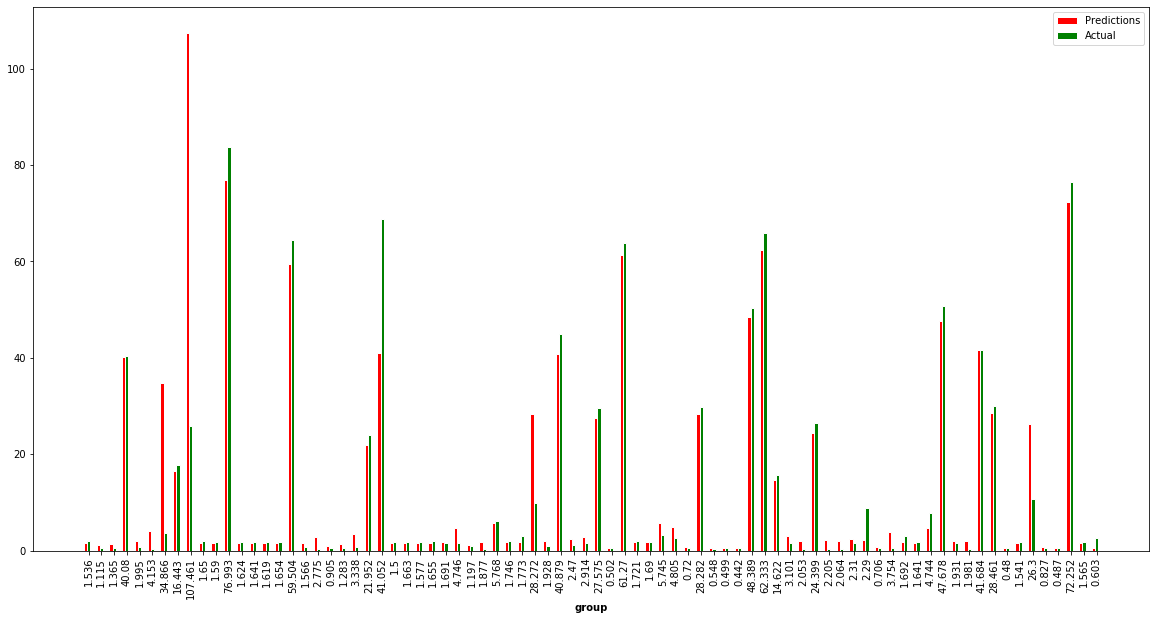

In [236]:
# set width of bar
barWidth = 0.25

f = plt.figure(figsize=(20,10))
bars1 = p
bars2 = a
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
# r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, color='red', width=barWidth, edgecolor='white', label='Predictions')
plt.bar(r2, bars2, color='green', width=barWidth, edgecolor='white', label='Actual')
# plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='var3')
 
# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], p, rotation='vertical')
 
# Create legend & Show graphic
plt.legend()
plt.show()


In [237]:
res = dict()
for i in range(len(X.columns)):
    res.update({X.columns[i]: regr.feature_importances_[i]})
    print(i, end = "\r")
    


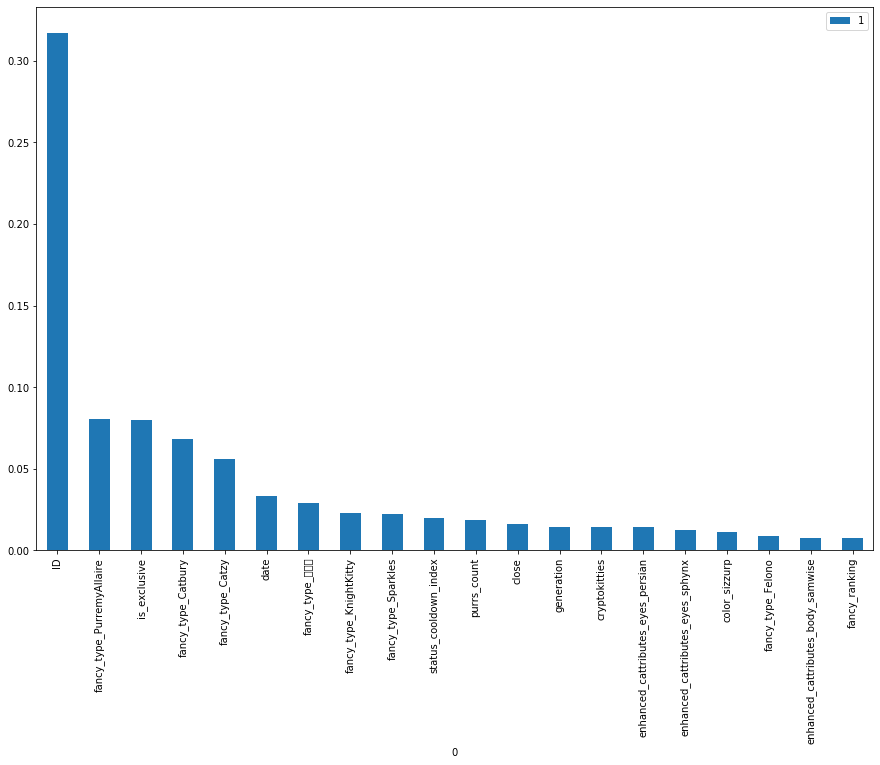

In [238]:
import warnings
warnings.filterwarnings("ignore")
pd.DataFrame(res.items()).sort_values(by = 1, ascending=False)[:20].plot.bar(x = 0,figsize=(15,10))